In [5]:
import mlxtend #apiori알고리즘 관련 라이브러리
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from mlxtend.preprocessing import TransactionEncoder


In [7]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [8]:
te = TransactionEncoder()

In [9]:
te_ary = te.fit(data).transform(data)
te_ary

array([[ True, False, False,  True,  True],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False, False]])

In [10]:
te.columns_

['기저귀', '맥주', '양상추', '우유', '쥬스']

In [11]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [12]:
from mlxtend.frequent_patterns import apriori

In [39]:
result = apriori(df, min_support=0.5, use_colnames=True)
result

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 우유)"
7,0.50,"(쥬스, 기저귀)"
8,0.50,"(맥주, 양상추)"
9,0.50,"(쥬스, 우유)"


In [53]:
# result에서 마지막 itemsets 컬럼값 추출

result.iloc[-1:,:]

,support,itemsets
10,0.5,"(쥬스, 기저귀, 우유)"


In [54]:
## 쥬스, 우유와 함께추천하면 좋을 item은??

for index in result.index:
    if '우유' in (result.loc[index,'itemsets']) and '쥬스' in (result.loc[index,'itemsets']) and len(result.loc[index,'itemsets'])>2:
        print(result.loc[index,:])

support               0.5
itemsets    (쥬스, 기저귀, 우유)
Name: 10, dtype: object


In [55]:
## TF-IDF, CounterVectorizor, TransactionEncoder

In [56]:
from gensim.models import Word2Vec

In [18]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white',
    'we say unhappy and angry black'
]

In [57]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.',
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [20]:
## 문장을 토큰으로 끊어내자.
sentences = [ one.split(' ') for one in doc ] 
#[처리내용 for one in 복수형태의자료구조] => 항상 결과는 리스트
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [21]:
sentences2 = [ one.split(' ') for one in doc2 ] 
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [58]:
model = Word2Vec(window=1, min_count=1) ## 특정한 단어의 앞뒤 단어를 유추 가능
## window: 유추하는 계산을 할 때 특정한 단어의 앞뒤 몇개를 가지고 계산을 할지의 단위
## min_count: 특정한 패턴의 출현 횟수

In [59]:
#embedding_model = Word2Vec(tokenized_contents, size=100, window = 2, min_count=50, workers=4, iter=100, sg=1)

In [60]:
model2 = Word2Vec(window=2, min_count=1)

In [61]:
model.build_vocab(sentences) # 영문문장을 가지고 계산을 함

In [63]:
## 특정한 단어를 주고 앞뒤 단어를 추론해보자.
model.wv.most_similar('say') ## 비지도

[('or', 0.21617142856121063),
 ('hello', 0.0931011214852333),
 ('said', 0.09291722625494003),
 ('i', 0.0796348825097084),
 ('happy', 0.06285078078508377),
 ('you', 0.05433366447687149),
 ('he', 0.0270574688911438),
 ('white', 0.016134681180119514),
 ('and', -0.01083916611969471),
 ('unhappy', -0.02775036171078682)]

In [64]:
model.wv.most_similar('or')

[('say', 0.21617141366004944),
 ('he', 0.044689226895570755),
 ('happy', 0.015025204978883266),
 ('you', 0.01069522276520729),
 ('white', 0.0019510603742673993),
 ('black', -0.03284316882491112),
 ('goodbye', -0.04552275687456131),
 ('hello', -0.04568909481167793),
 ('i', -0.0742427185177803),
 ('said', -0.09326909482479095)]

In [ ]:
## or 단어 앞으로는 say가 나올 가능성이 제일 크고,
## or 단어 뒤로는 black단어가 나올 가능성이 제일 큰 것을 알 수 있다

In [65]:
model2.build_vocab(sentences2)

In [66]:
model2.wv.most_similar('너는') 

[('했어.', 0.13149002194404602),
 ('슬프다고', 0.07497557997703552),
 ('굿바이라고', 0.06797594577074051),
 ('기쁘다고', 0.04157734289765358),
 ('않고,', 0.04130808636546135),
 ('행복하지', 0.012979966588318348),
 ('슬퍼', 0.006598460953682661),
 ('블랙으로', -0.009253415279090405),
 ('했고,', -0.013514935038983822),
 ('하얗게', -0.013679753057658672)]

In [68]:
## '너는' 한글 단어 앞으로 나올단어로는 '굿바이라고'를 추천,
## '너는' 한글 단어 뒤로 나올 단어로는 헬로우라고를 추천

In [67]:
model2.wv.most_similar('했고,') 

[('슬프다고', 0.19912061095237732),
 ('않고,', 0.17272791266441345),
 ('헬로우라고', 0.17018885910511017),
 ('기쁘다고', 0.14595060050487518),
 ('했어.', 0.06408978998661041),
 ('블랙으로', 0.04652618616819382),
 ('하얗게', -0.002754023764282465),
 ('너는', -0.013514941558241844),
 ('굿바이라고', -0.023671653121709824),
 ('우리는', -0.032843176275491714)]

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [69]:
tfidf = TfidfVectorizer(stop_words='english')
## tfidf는 빈도수를 구하긴 하지만, 문서마다 자주 등장하는 문서는 각 문서를 구분할 단어로 사용하기는 
## 부적합하여 가중치를 낮추어 계싼

In [70]:
tfidf_matrix = tfidf.fit_transform(doc)
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (3, 9)


In [32]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.54270061, 0.        , 0.54270061,
        0.        , 0.64105545, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54645401, 0.        ,
        0.54645401, 0.32274454, 0.        , 0.54645401],
       [0.54645401, 0.54645401, 0.        , 0.        , 0.        ,
        0.        , 0.32274454, 0.54645401, 0.        ]])

In [33]:
# 문서간의 유사도를 구해봅시다!!
cosine_similarity(tfidf_matrix, tfidf_matrix) ##문장에 대한 코사인유사도

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

In [ ]:
## 행은 문서1, 문서2, 문서3
## 열도 문서1, 문서2, 문서3
## 문서1 + 문서2: 0.21
## 문서1 + 문서3: 0.21
## 문서2 + 문서3: 0.10
## 문서1과 2, 문서1과 3이 유사
## 문서2와 3은 유가하지 않다

In [34]:
## 문서1과 문서2는 21%정도 유사도가 있다.
## 문서1과 문서3은 21%정도 유사도가 있다.
## 문서2와 문서3은 10%정도 유사도가 있다.

In [74]:
## 1. 모든 장바구니 유사도를 구해보세요
similarity = cosine_similarity(te_ary, te_ary) ##장바구니에 대한 코사인유사도
similarity



array([[1.        , 0.33333333, 0.8660254 , 0.        ],
       [0.33333333, 1.        , 0.57735027, 0.81649658],
       [0.8660254 , 0.57735027, 1.        , 0.35355339],
       [0.        , 0.81649658, 0.35355339, 1.        ]])

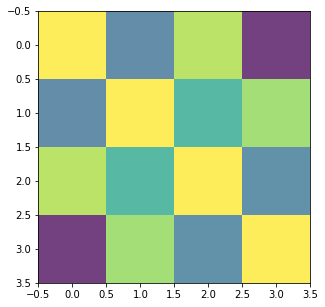

In [92]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(similarity, alpha=0.75)
plt.show()

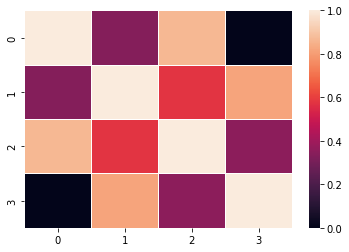

In [99]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(similarity, linewidth=0.5)
plt.show()

In [98]:
np.random.rand(4, 4)

array([[0.73871004, 0.22724011, 0.07778963, 0.17922356],
       [0.27661892, 0.05934138, 0.80305761, 0.66836217],
       [0.26497854, 0.1719185 , 0.461801  , 0.26355236],
       [0.15045944, 0.64824855, 0.94164335, 0.97706822]])

In [75]:
## 2. 장바구니 1번과 제일 유사도가 높은 장바구니를 찾아서
## 장바구니 1번과 제일 유사도가 높은 장바구니는 3번이다

In [83]:
## 3. 장바구니 1번에게 추천해주고 싶은 item을 추천해주세요
sorted_nums = sorted(similarity[0], reverse=True)
def recommend(x):
    for i, item in enumerate(similarity[x]):
        if item == sorted_nums[1]:
            return i, x
i, x = recommend(0)
recommend_result = list(set(data[i]) - set(data[x]))
recommend_result

['양상추']